<a href="https://colab.research.google.com/github/LivenetsTatiana/works/blob/main/MachineLearning/DigitRecognitionConvolutionalNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Распознование рукописных цифр. Сверточная нейронная сеть <center/>**
**Цель**: поистроить сверточную нейронную сеть для распознования рукописных чисел по картинкам

**Задания:**
1. Описание исходных данных.
2. Подготовка данных для работы с нейронной сетью.
3. Построение модели нейронной сети и ее визуализация.
4. Визуализация процесса обучения модели.
5. Выводы.



In [ ]:
# необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, utils
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation

from tensorflow.keras.datasets import mnist
from keras.utils.image_utils import load_img

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Загрузка данных

В качестве датасета используется mnist, который представляет из себя изображения рукописных цифр размером 28*28 пикселей

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных

In [ ]:
#приведение значения яркости каждого пикселя исходных изображений из диапазона [0, 255] в диапазон [0, 1].
#print(x_train[0])
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Reshape: (количество данных, размер изображения, размер изображения, количестово каналов)

у нас чб изображение, поэтому канал 1, для цветных изображений количество каналов определяются цветовой моделью (например для rgb - 3 канала)

# Векторизация меток класса

In [ ]:
#векторизация ответов, что это за цифра
#в итоге получаем вектор, индекс 1 в котором означает пренадлежность к классу цифры индекса
y_test_ = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Построение модели 1

In [ ]:
# создание модели
model = Sequential()
# Добавляем слой
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# kernel_size=3 — размер ядра 3х3. Функция активации 'relu' ( Rectified Linear Activation ),
# 64 это число ядер свертки( сколько признаком будем искать)
# Второй сверточный слой
model.add(Conv2D(32, kernel_size=3, activation='relu'))
# Создаем вектор для полносвязной сети.
model.add(Flatten()) # Flatten() – слой, преобразующий 2D-данные в 1D-данные.
# Создадим однослойный перцептрон
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 flatten_6 (Flatten)         (None, 18432)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


Метрика - точность, функция потерь - categorical_crossentropy, оптимизация - adam

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 127s 67ms/step - loss: 0.1250 - accuracy: 0.9633 - val_loss: 0.0554 - val_accuracy: 0.9811
Epoch 2/5
1875/1875 [==============================] - 127s 67ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0473 - val_accuracy: 0.9844
Epoch 3/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 4/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0133 - accuracy: 0.9953 - val_loss: 0.0610 - val_accuracy: 0.9841


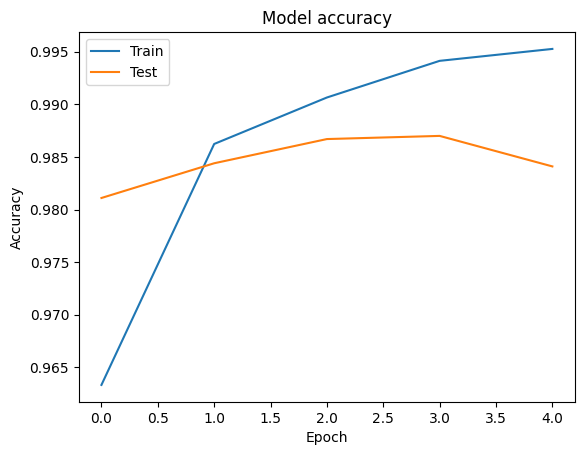

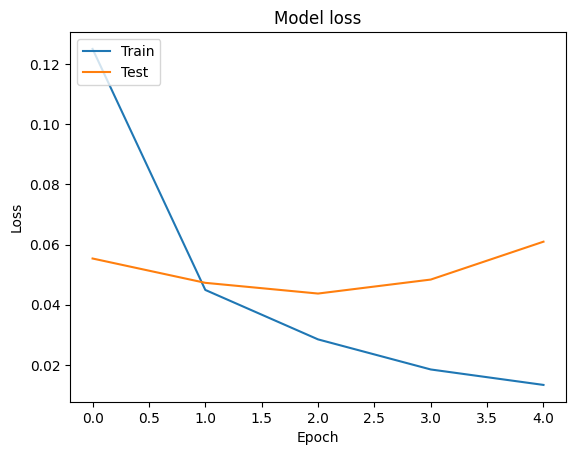

313/313 [==============================] - 5s 17ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(x_test) > 0.5).astype("int32")
print(ynew)

# Построение модели 2

1слой - 64 фильтра с ядром 3*3

2слой - сканируем

-> свертка 14*14

3слой - 128 фильтров с ядром 3*3

4слой - вытягиваем тензор в вектор

5слой - выходной

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, kernel_size=3, activation='relu'))
model2.add(Flatten())
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 flatten_9 (Flatten)         (None, 15488)             0         
                                                                 
 dense_12 (Dense)            (None, 10)                154890    
                                                                 
Total params: 229,386
Trainable params: 229,386
Non-trainable params: 0
________________________________________________

Метрика - точность, функция потерь - минимальная квадратичная ошибка, оптимизация - градиентный спуск

In [ ]:
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
history = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0888 - accuracy: 0.3925 - val_loss: 0.0871 - val_accuracy: 0.5647
Epoch 2/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0814 - accuracy: 0.5460 - val_loss: 0.0680 - val_accuracy: 0.5899
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0434 - accuracy: 0.7545 - val_loss: 0.0257 - val_accuracy: 0.8583
Epoch 4/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0223 - accuracy: 0.8679 - val_loss: 0.0184 - val_accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0182 - accuracy: 0.8859 - val_loss: 0.0161 - val_accuracy: 0.8989


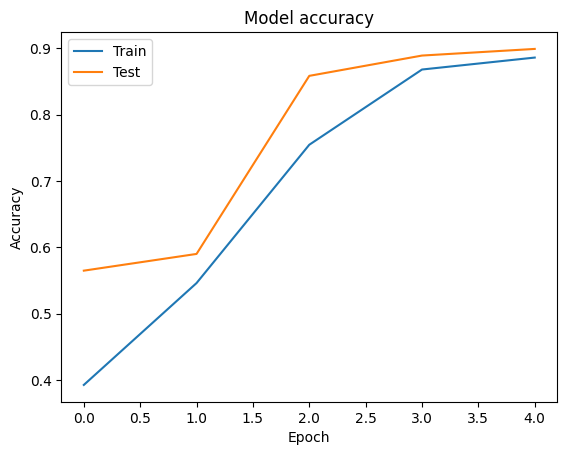

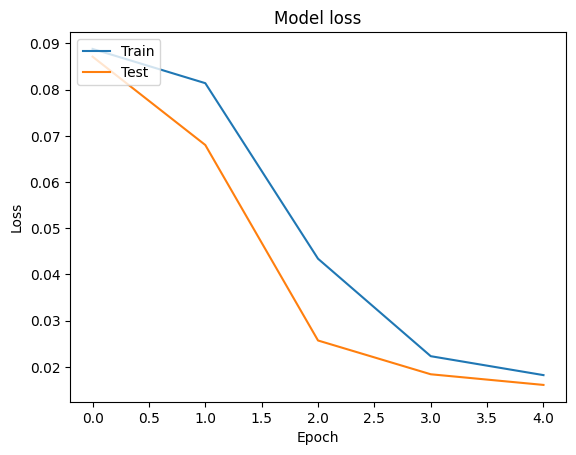

313/313 [==============================] - 5s 15ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(x_test) > 0.5).astype("int32")
print(ynew)

# Построение модели 3

1слой - 32 фильтра с ядром 3*3, учтена рамка (padding='same')

2слой - с шагом сканирования 2 и окном 2*2

-> первая свертка (теперь размер тензора 14*14)

3слой - 64 фильтра с ядром 3*3, учтена рамка (padding='same')

4слой - с шагом сканирования 2 и окном 2*2

-> вторая свертка (теперь размер тензора 7*7)

5слой - Flatten - вытягиваем тензор в вектор

6слой - обработка

7слой - выходной

In [ ]:
model3 = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
model3.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.5328 - accuracy: 0.8365 - val_loss: 0.1821 - val_accuracy: 0.9426
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1517 - accuracy: 0.9535 - val_loss: 0.1164 - val_accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1025 - accuracy: 0.9685 - val_loss: 0.0902 - val_accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0802 - accuracy: 0.9759 - val_loss: 0.0630 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0590 - val_accuracy: 0.9817


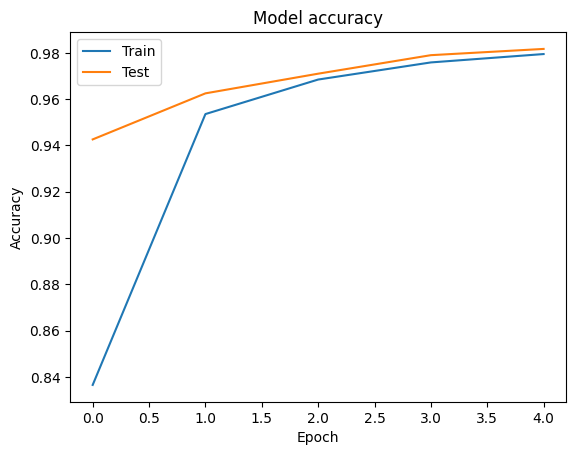

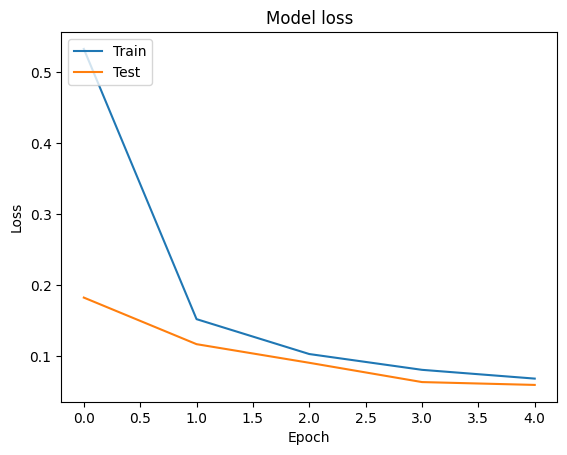

313/313 [==============================] - 5s 15ms/step
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
plt.plot (history.history['accuracy'])

plt.plot (history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel ('Accuracy')
plt.xlabel ('Epoch')

plt.legend(['Train', 'Test'], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot (history.history['loss'])

plt.plot (history.history['val_loss'])
plt.title('Model loss')

plt.ylabel ("Loss")

plt.xlabel ("Epoch")

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ynew = (model.predict(x_test) > 0.5).astype("int32")
print(ynew)

# **Вывод**

Построены 3 модели сверточных нейронных сетей, которые принимают на вход массив, задающий цифры 28*28 пикселей и выдает массив с 0 и 1, индекс положения 1 в котром - цифра, которая была распознана моделью.

Как видно из процесса обучения на 5 эпох accuracy и val_accuracy у:

model1 (0.9953, 0.9841)

model2 (0.8859, 0.8989)

model3 (0.9795, 0.9817)

Т. е модель 1 показывает лучшую точность из трех представленных.